In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.style.use('ggplot')

# Create a BigQuery client
client = bigquery.Client.from_service_account_json("key.json")

In [69]:
query = """
SELECT * FROM `cse-6242-fa24-lz.hurricane.points`
"""
points = client.query(query).to_dataframe()

/home/chen112p/.pyenv/versions/3.12.4/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [62]:
query = """
SELECT * FROM `cse-6242-fa24-lz.hurricane.lines`
"""
lines = client.query(query).to_dataframe()

/home/chen112p/.pyenv/versions/3.12.4/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [63]:
query = """
SELECT * FROM `cse-6242-fa24-lz.hurricane.radii`
"""
radii = client.query(query).to_dataframe()

/home/chen112p/.pyenv/versions/3.12.4/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [35]:
query = """
SELECT * FROM `cse-6242-fa24-lz.hurricane.windswath`
"""
windswath = client.query(query).to_dataframe()

/home/chen112p/.pyenv/versions/3.12.4/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [76]:
points

,ogc_fid,stormname,dtg,year,month,day,hhmm,mslp,basin,stormnum,stormtype,intensity,ss,lat,lon,stormid,tau,GEOMETRY
0,1,SIX,2.021081e+09,2021.0,08,9.0,1800,1011.0,al,6.0,DB,30.0,0.0,13.9,-58.7,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\x9a\x99\x99\x99\x99...
1,2,SIX,2.021081e+09,2021.0,08,10.0,0,1011.0,al,6.0,DB,30.0,0.0,14.6,-60.1,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
2,3,SIX,2.021081e+09,2021.0,08,10.0,600,1011.0,al,6.0,DB,30.0,0.0,15.3,-61.6,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
3,4,SIX,2.021081e+09,2021.0,08,10.0,1200,1011.0,al,6.0,DB,30.0,0.0,16.0,-63.1,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
4,5,SIX,2.021081e+09,2021.0,08,10.0,1800,1011.0,al,6.0,DB,30.0,0.0,16.7,-64.6,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00fffff&P\xc033333\xb3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,11644,ENRIQUE,2.021063e+09,2021.0,06,29.0,1200,999.0,ep,5.0,TS,40.0,0.0,22.2,-107.5,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\x00\x00\x00\x00\x00...
11644,11645,ENRIQUE,2.021063e+09,2021.0,06,29.0,1800,1003.0,ep,5.0,TS,35.0,0.0,22.9,-108.0,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\x00\x00\x00\x00\x00...
11645,11646,ENRIQUE,2.021063e+09,2021.0,06,30.0,0,1003.0,ep,5.0,TS,35.0,0.0,23.5,-108.7,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
11646,11647,ENRIQUE,2.021063e+09,2021.0,06,30.0,600,1003.0,ep,5.0,TS,35.0,0.0,24.0,-109.3,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x0033333S[\xc0\x00\x00\...


In [72]:
import geopandas as gpd
world = gpd.read_file("countries/ne_10m_admin_0_countries.shp")

In [81]:
import matplotlib.pyplot as plt

In [107]:
points

,ogc_fid,stormname,dtg,year,month,day,hhmm,mslp,basin,stormnum,stormtype,intensity,ss,lat,lon,stormid,tau,GEOMETRY
0,1,SIX,2.021081e+09,2021.0,08,9.0,1800,1011.0,al,6.0,DB,30.0,0.0,13.9,-58.7,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\x9a\x99\x99\x99\x99...
1,2,SIX,2.021081e+09,2021.0,08,10.0,0,1011.0,al,6.0,DB,30.0,0.0,14.6,-60.1,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
2,3,SIX,2.021081e+09,2021.0,08,10.0,600,1011.0,al,6.0,DB,30.0,0.0,15.3,-61.6,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
3,4,SIX,2.021081e+09,2021.0,08,10.0,1200,1011.0,al,6.0,DB,30.0,0.0,16.0,-63.1,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
4,5,SIX,2.021081e+09,2021.0,08,10.0,1800,1011.0,al,6.0,DB,30.0,0.0,16.7,-64.6,AL062021,NaN,b'\x00\x01\xe6\x10\x00\x00fffff&P\xc033333\xb3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,11644,ENRIQUE,2.021063e+09,2021.0,06,29.0,1200,999.0,ep,5.0,TS,40.0,0.0,22.2,-107.5,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\x00\x00\x00\x00\x00...
11644,11645,ENRIQUE,2.021063e+09,2021.0,06,29.0,1800,1003.0,ep,5.0,TS,35.0,0.0,22.9,-108.0,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\x00\x00\x00\x00\x00...
11645,11646,ENRIQUE,2.021063e+09,2021.0,06,30.0,0,1003.0,ep,5.0,TS,35.0,0.0,23.5,-108.7,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x00\xcd\xcc\xcc\xcc\xcc...
11646,11647,ENRIQUE,2.021063e+09,2021.0,06,30.0,600,1003.0,ep,5.0,TS,35.0,0.0,24.0,-109.3,EP052021,NaN,b'\x00\x01\xe6\x10\x00\x0033333S[\xc0\x00\x00\...


0

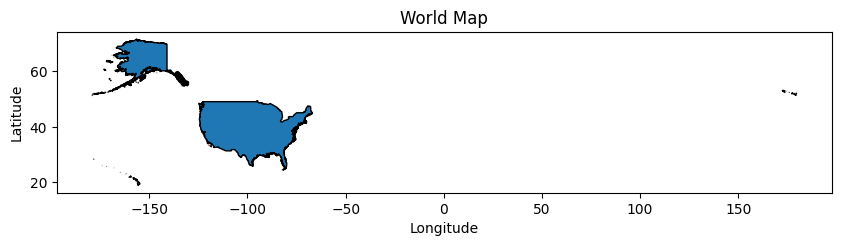

In [104]:
us = world[world['ADMIN'] == 'United States of America']

# Plot the world map
us.plot(figsize=(10, 6), edgecolor="black")
plt.title("World Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [64]:
windswath.stormnum.unique()

array([ 6.,  5.,  8.,  3., 18., 13.,  2., 20., 10., 23.,  1., 15., 16.,
       12., 11.,  9., 28.,  4.,  7., 25., 17., 14., 19., 26., 30., 21.,
       22., 24., 31., 27., 29.])

In [33]:
date_range = pd.date_range(start="2014-06-01", end="2023-11-30", freq="MS")
# Filter to keep only June to November for each year
date_range = date_range[date_range.month.isin([6, 7, 8, 9, 10, 11])]

In [54]:
from shapely.wkb import loads

In [56]:
geometry_bytes = bytes(geometry_str, "utf-8").decode("unicode_escape").encode("latin1")


In [58]:
geometry = loads(geometry_bytes)


GEOSException: ParseException: Unknown WKB type 39